## Loading the data

First we set up our imports:

In [1]:
import numpy as np

import yt

First we load the data set, specifying both the unit length/mass/velocity, as well as the size of the bounding box (which should encapsulate all the particles in the data set)

At the end, we flatten the data into "ad" in case we want access to the raw simulation data

>This dataset is available for download at https://yt-project.org/data/GadgetDiskGalaxy.tar.gz (430 MB).

In [2]:
fname = "GadgetDiskGalaxy/snapshot_200.hdf5"

unit_base = {
    "UnitLength_in_cm": 3.08568e21,
    "UnitMass_in_g": 1.989e43,
    "UnitVelocity_in_cm_per_s": 100000,
}

bbox_lim = 1e5  # kpc

bbox = [[-bbox_lim, bbox_lim], [-bbox_lim, bbox_lim], [-bbox_lim, bbox_lim]]

ds = yt.load(fname, unit_base=unit_base, bounding_box=bbox)
ds.index
ad = ds.all_data()

Let's make a projection plot to look at the entire volume


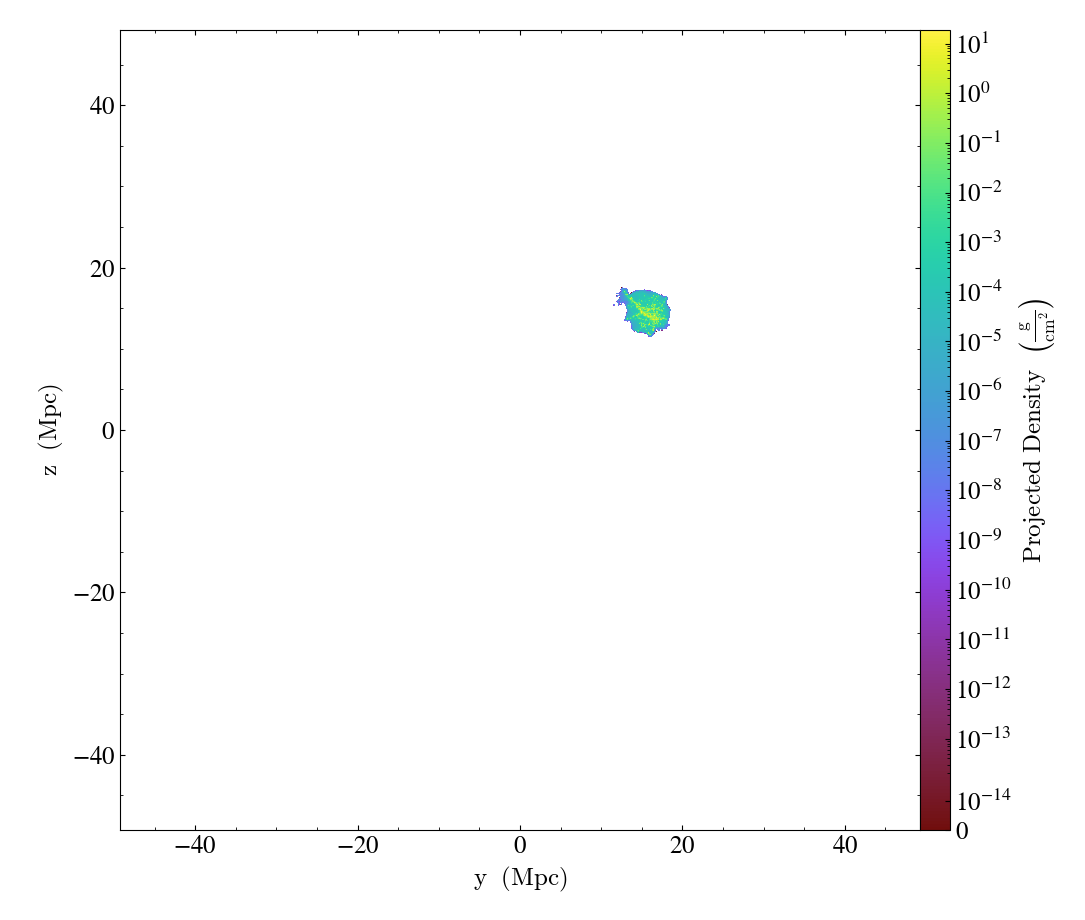

In [3]:
px = yt.ProjectionPlot(ds, "x", ("gas", "density"))
px.show()

Let's print some quantities about the domain, as well as the physical properties of the simulation


In [4]:
print("left edge: ", ds.domain_left_edge)
print("right edge: ", ds.domain_right_edge)
print("center: ", ds.domain_center)

left edge:  [-100000. -100000. -100000.] code_length
right edge:  [100000. 100000. 100000.] code_length
center:  [0. 0. 0.] code_length


We can also see the fields that are available to query in the dataset

In [5]:
sorted(ds.field_list)

[('PartType0', 'ArtificialViscosity'),
 ('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'ElectronAbundance'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'Masses'),
 ('PartType0', 'Metallicity_00'),
 ('PartType0', 'Metallicity_01'),
 ('PartType0', 'Metallicity_02'),
 ('PartType0', 'Metallicity_03'),
 ('PartType0', 'Metallicity_04'),
 ('PartType0', 'Metallicity_05'),
 ('PartType0', 'Metallicity_06'),
 ('PartType0', 'Metallicity_07'),
 ('PartType0', 'Metallicity_08'),
 ('PartType0', 'Metallicity_09'),
 ('PartType0', 'Metallicity_10'),
 ('PartType0', 'Metallicity_11'),
 ('PartType0', 'NeutralHydrogenAbundance'),
 ('PartType0', 'ParticleIDs'),
 ('PartType0', 'SmoothingLength'),
 ('PartType0', 'StarFormationRate'),
 ('PartType0', 'Velocities'),
 ('PartType1', 'Coordinates'),
 ('PartType1', 'Masses'),
 ('PartType1', 'ParticleIDs'),
 ('PartType1', 'Velocities'),
 ('PartType2', 'Coordinates'),
 ('PartType2', 'Masses'),
 ('PartType2', 'ParticleIDs'),
 ('PartType2', 

Let's create a data object that represents the full simulation domain, and find the total mass in gas and dark matter particles contained in it:

In [6]:
ad = ds.all_data()

# total_mass returns a list, representing the total gas and dark matter + stellar mass, respectively
print([tm.in_units("Msun") for tm in ad.quantities.total_mass()])

[unyt_quantity(1.9544932e+13, 'Msun'), unyt_quantity(2.89850983e+16, 'Msun')]


Now let's say we want to zoom in on the box (since clearly the bounding we chose initially is much larger than the volume containing the gas particles!), and center on wherever the highest gas density peak is.  First, let's find this peak:

In [7]:
density = ad["PartType0", "density"]
wdens = np.where(density == np.max(density))
coordinates = ad["PartType0", "Coordinates"]
center = coordinates[wdens][0]
print("center = ", center)

center =  [31995.63476562 31473.6640625  28969.88671875] code_length


Set up the box to zoom into

In [8]:
new_box_size = ds.quan(250, "code_length")

left_edge = center - new_box_size / 2
right_edge = center + new_box_size / 2

print(new_box_size.in_units("Mpc"))
print(left_edge.in_units("Mpc"))
print(right_edge.in_units("Mpc"))

0.12315295332038365 Mpc
[15.69985118 15.44272225 14.20933195] Mpc
[15.82300414 15.5658752  14.3324849 ] Mpc


In [9]:
ad2 = ds.region(center=center, left_edge=left_edge, right_edge=right_edge)

Using this new data object, let's confirm that we're only looking at a subset of the domain by first calculating the total mass in gas and particles contained in the subvolume:

In [10]:
print([tm.in_units("Msun") for tm in ad2.quantities.total_mass()])

[unyt_quantity(2.72364232e+11, 'Msun'), unyt_quantity(2.52337044e+12, 'Msun')]


And then by visualizing what the new zoomed region looks like


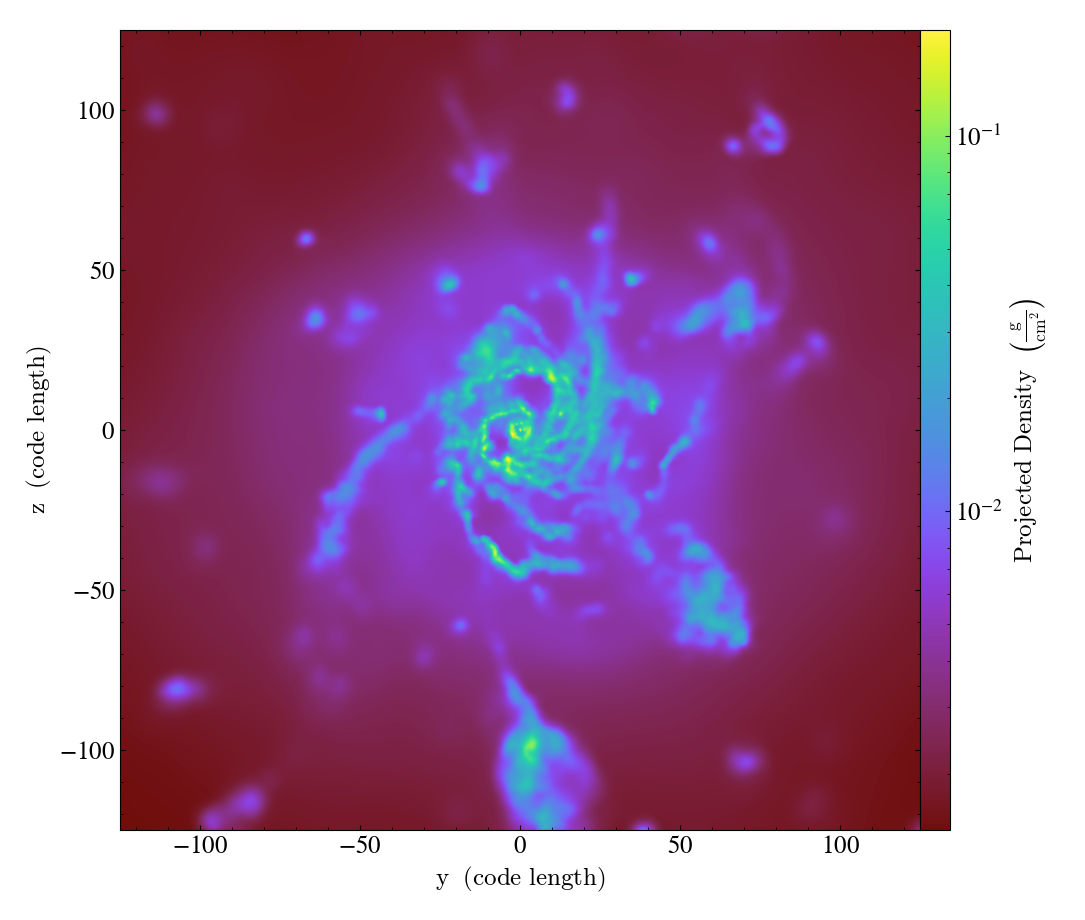

In [11]:
px = yt.ProjectionPlot(ds, "x", ("gas", "density"), center=center, width=new_box_size)
px.show()

Cool - there's a disk galaxy there!